# Predicting Heart Disease

## Importing libraries

In [10]:
import pandas as pd
import numpy as np

## Load Dataset

In [11]:
df = pd.read_csv('data/train.csv')

In [12]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,630000.0,314999.500000,181865.479132,0.0,157499.75,314999.5,472499.25,629999.0
Age,630000.0,54.136706,8.256301,29.0,48.00,54.0,60.00,77.0
Sex,630000.0,0.714735,0.451541,0.0,0.00,1.0,1.00,1.0
Chest pain type,630000.0,3.312752,0.851615,1.0,3.00,4.0,4.00,4.0
BP,630000.0,130.497433,14.975802,94.0,120.00,130.0,140.00,200.0
Cholesterol,630000.0,245.011814,33.681581,126.0,223.00,243.0,269.00,564.0
FBS over 120,630000.0,0.079987,0.271274,0.0,0.00,0.0,0.00,1.0
EKG results,630000.0,0.981660,0.998783,0.0,0.00,0.0,2.00,2.0
Max HR,630000.0,152.816763,19.112927,71.0,142.00,157.0,166.00,202.0
Exercise angina,630000.0,0.273725,0.445870,0.0,0.00,0.0,1.00,1.0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,630000.0,314999.500000,181865.479132,0.0,157499.75,314999.5,472499.25,629999.0
Age,630000.0,54.136706,8.256301,29.0,48.00,54.0,60.00,77.0
Sex,630000.0,0.714735,0.451541,0.0,0.00,1.0,1.00,1.0
Chest pain type,630000.0,3.312752,0.851615,1.0,3.00,4.0,4.00,4.0
BP,630000.0,130.497433,14.975802,94.0,120.00,130.0,140.00,200.0
Cholesterol,630000.0,245.011814,33.681581,126.0,223.00,243.0,269.00,564.0
FBS over 120,630000.0,0.079987,0.271274,0.0,0.00,0.0,0.00,1.0
EKG results,630000.0,0.981660,0.998783,0.0,0.00,0.0,2.00,2.0
Max HR,630000.0,152.816763,19.112927,71.0,142.00,157.0,166.00,202.0
Exercise angina,630000.0,0.273725,0.445870,0.0,0.00,0.0,1.00,1.0


In [17]:
df.isna().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

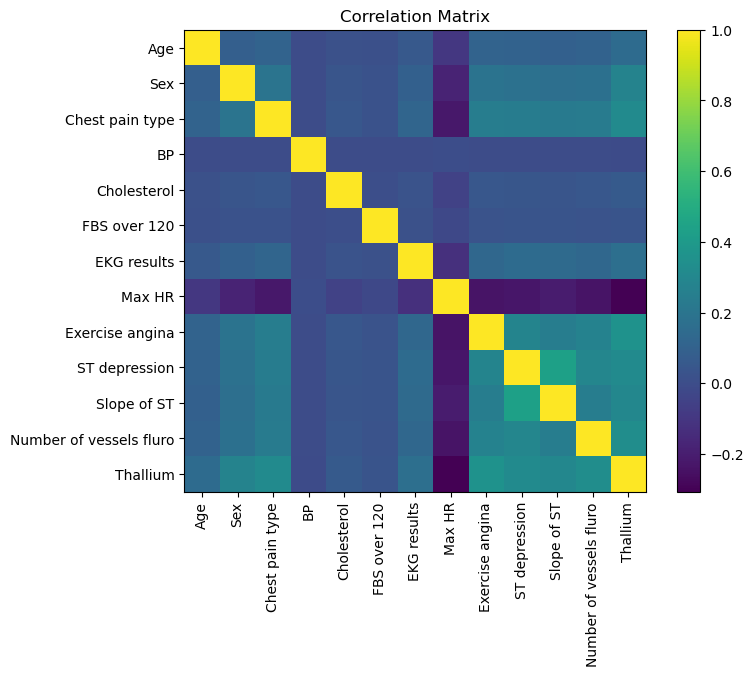

In [19]:
import matplotlib.pyplot as plt
# remove id and keep only numeric columns
num_df = df.drop(columns=["id"]).select_dtypes(include="number")
corr = num_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


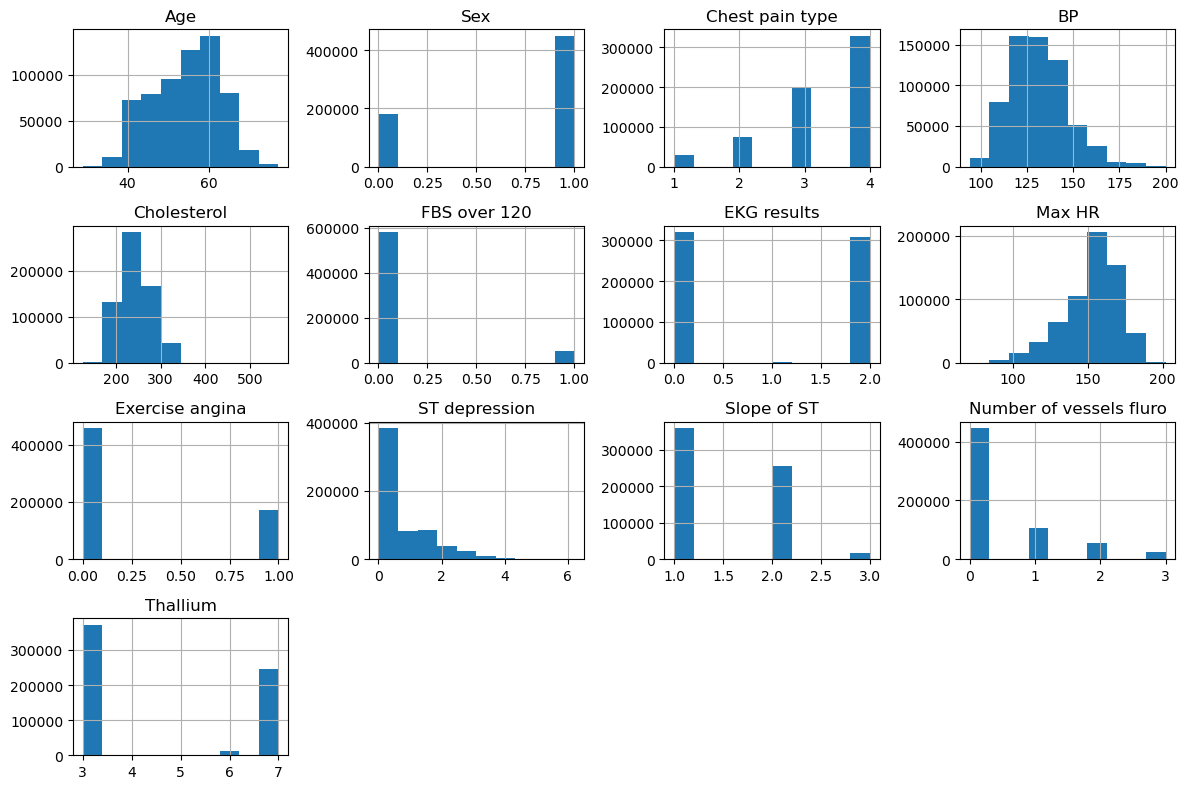

In [20]:
num_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


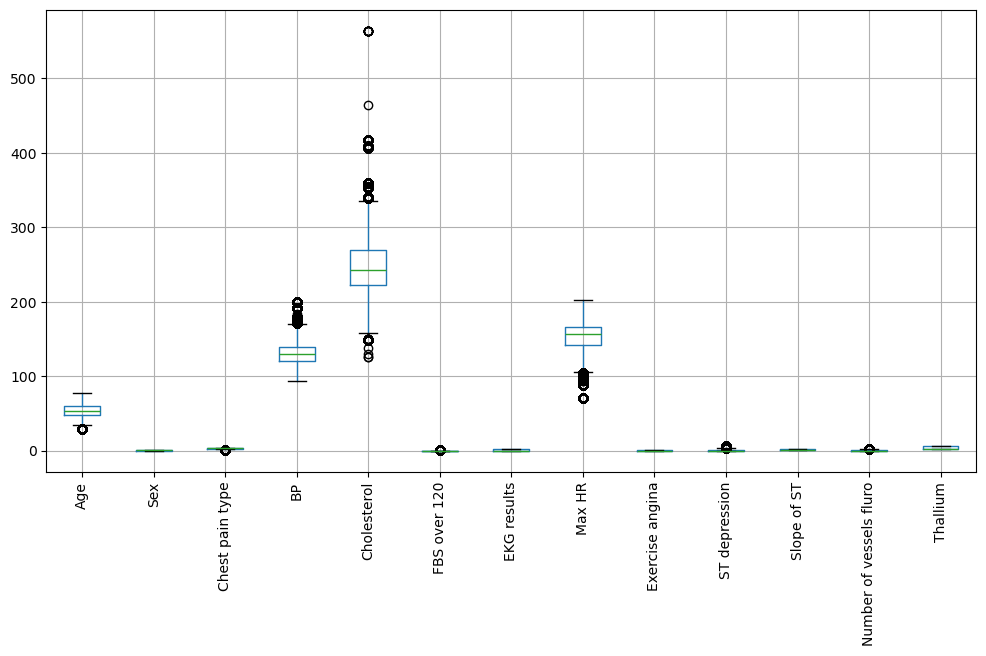

In [21]:
plt.figure(figsize=(12,6))
num_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [22]:
Q1 = df["Cholesterol"].quantile(0.15)
Q3 = df["Cholesterol"].quantile(0.80)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["Cholesterol"] = df["Cholesterol"].clip(lower, upper)

In [23]:
df = df.drop(columns=['id'])

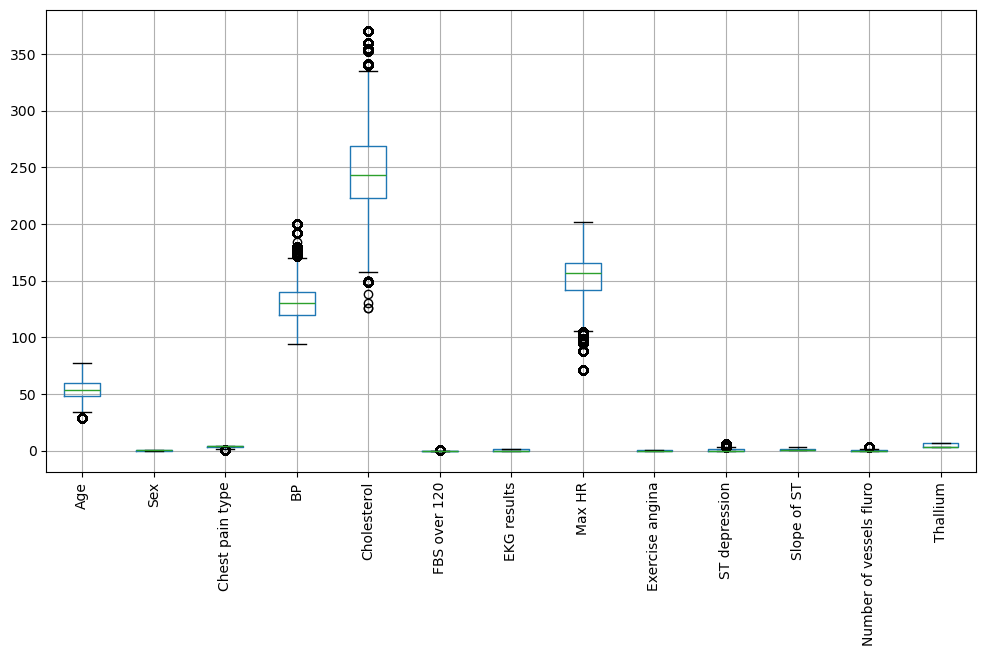

In [24]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [25]:
num_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7
629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3
629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7
629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6


In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# features & target
X = df.drop(columns=["Heart Disease", "id"], errors="ignore")
y = df["Heart Disease"].map({"Absence": 0, "Presence": 1})

In [27]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='str')

In [28]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# basic XGBoost model
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# train
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8894285714285715
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     69509
           1       0.88      0.87      0.88     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.89      0.89    126000
weighted avg       0.89      0.89      0.89    126000



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
dfT = pd.read_csv('data/test.csv')
X_test_comp = dfT.drop(columns=["id"], errors="ignore")
test_preds = model.predict(X_test_comp)
submission = pd.DataFrame({
    "id": dfT["id"],
    "Heart Disease": test_preds
})

submission.to_csv("submission.csv", index=False)

------
## Optuna 

In [60]:
X_tune = X_train.sample(200000, random_state=42)
y_tune = y_train.loc[X_tune.index]

In [61]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1000, 2000),
        "max_depth": trial.suggest_int("max_depth", 1, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)
    model.fit(X_tune, y_tune)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)


In [62]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2026-02-13 19:12:33,470] A new study created in memory with name: no-name-c7a9e54b-1524-46d4-9850-b760127c8362
[I 2026-02-13 19:12:44,501] Trial 0 finished with value: 0.8898174603174603 and parameters: {'n_estimators': 1655, 'max_depth': 2, 'learning_rate': 0.18412131210943952, 'subsample': 0.8539709448776096, 'colsample_bytree': 0.90184707072923}. Best is trial 0 with value: 0.8898174603174603.
[I 2026-02-13 19:12:56,623] Trial 1 finished with value: 0.8872777777777778 and parameters: {'n_estimators': 1861, 'max_depth': 4, 'learning_rate': 0.17131392467045084, 'subsample': 0.9128834926165822, 'colsample_bytree': 0.7796119910482424}. Best is trial 0 with value: 0.8898174603174603.
[I 2026-02-13 19:13:03,070] Trial 2 finished with value: 0.8899206349206349 and parameters: {'n_estimators': 1611, 'max_depth': 2, 'learning_rate': 0.16764161412906914, 'subsample': 0.9447915776409546, 'colsample_bytree': 0.8910261219406843}. Best is trial 2 with value: 0.8899206349206349.
[I 2026-02-13 1

In [68]:
best_params = study.best_params

final_model = XGBClassifier(
    **best_params,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

final_preds = final_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Final Accuracy:", accuracy_score(y_test, final_preds))

Final Accuracy: 0.890452380952381


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1])
dfT = pd.read_csv('data/test.csv')
X_test_comp = dfT.drop(columns=["id"], errors="ignore")
test_preds = final_model.predict(X_test_comp)
submission = pd.DataFrame({
    "id": dfT["id"],
    "Heart Disease": test_preds
})

submission.to_csv("submission_optuna_xgb.csv", index=False)

## Optuna lightGBM + Catboost

In [ ]:
X_tune = X_train.sample(100000, random_state=42)
y_tune = y_train.loc[X_tune.index]

In [97]:
import optuna
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):

    model_type = trial.suggest_categorical("model", ["lgbm", "cat"])

    if model_type == "lgbm":
        model = LGBMClassifier(
            n_estimators=trial.suggest_int("n_estimators", 200, 1000),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
            max_depth=trial.suggest_int("max_depth", 3, 8),
            subsample=trial.suggest_float("subsample", 0.7, 1.0),
            colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
            random_state=42,
            n_jobs=-1
        )

    else:
        model = CatBoostClassifier(
            iterations=trial.suggest_int("iterations", 150, 800),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2),
            depth=trial.suggest_int("depth", 2, 8),
            verbose=0,
            random_state=42
        )

    model.fit(X_tune, y_tune)

    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

In [98]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2026-02-13 19:39:19,658] A new study created in memory with name: no-name-0239b7b3-98af-4ee6-8f1f-73c298b5cbda
[I 2026-02-13 19:39:29,897] Trial 0 finished with value: 0.8861666666666667 and parameters: {'model': 'cat', 'iterations': 758, 'learning_rate': 0.11353105279222456, 'depth': 8}. Best is trial 0 with value: 0.8861666666666667.
[I 2026-02-13 19:39:36,272] Trial 1 finished with value: 0.8888015873015873 and parameters: {'model': 'cat', 'iterations': 752, 'learning_rate': 0.09794788849303342, 'depth': 3}. Best is trial 1 with value: 0.8888015873015873.
[I 2026-02-13 19:39:40,939] Trial 2 finished with value: 0.8889603174603175 and parameters: {'model': 'cat', 'iterations': 561, 'learning_rate': 0.12221058123490655, 'depth': 3}. Best is trial 2 with value: 0.8889603174603175.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2026-02-13 19:39:45,167] Trial 3 finished with value: 0.8876984126984127 and parameters: {'model': 'lgbm', 'n_estimators': 586, 'learning_rate': 0.10005919901390768, 'max_depth': 8, 'subsample': 0.9368475727825052, 'colsample_bytree': 0.7576002057226867}. Best is trial 2 with value: 0.8889603174603175.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:39:49,367] Trial 4 finished with value: 0.8872777777777778 and parameters: {'model': 'lgbm', 'n_estimators': 455, 'learning_rate': 0.11783464577600167, 'max_depth': 7, 'subsample': 0.9798151194178781, 'colsample_bytree': 0.8899846105068896}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02-13 19:39:57,908] Trial 5 finished with value: 0.8879761904761905 and parameters: {'model': 'cat', 'iterations': 663, 'learning_rate': 0.06109619609369544, 'depth': 8}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02-13 19:40:00,892] Trial 6 finished with value: 0.8888492063492064 and parameters: {'model': 'cat', 'iterations': 384, 'learning_rate': 0.07684590018218988, 'depth': 4}. Best is trial 2 with value: 0.8889603174603175.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:40:05,281] Trial 7 finished with value: 0.8862063492063492 and parameters: {'model': 'lgbm', 'n_estimators': 770, 'learning_rate': 0.12851355464764672, 'max_depth': 5, 'subsample': 0.7378613734224927, 'colsample_bytree': 0.8001470205773238}. Best is trial 2 with value: 0.8889603174603175.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:40:06,569] Trial 8 finished with value: 0.8883174603174603 and parameters: {'model': 'lgbm', 'n_estimators': 214, 'learning_rate': 0.16831343262139684, 'max_depth': 5, 'subsample': 0.9790553846973743, 'colsample_bytree': 0.8313079201157828}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02-13 19:40:10,468] Trial 9 finished with value: 0.8876269841269842 and parameters: {'model': 'cat', 'iterations': 495, 'learning_rate': 0.01745323170645113, 'depth': 4}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02-13 19:40:12,124] Trial 10 finished with value: 0.8888015873015873 and parameters: {'model': 'cat', 'iterations': 208, 'learning_rate': 0.1941892102152239, 'depth': 2}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02-13 19:40:16,287] Trial 11 finished with value: 0.8885238095238095 and parameters: {'model': 'cat', 'iterations': 383, 'learning_rate': 0.053565804518301084, 'depth': 5}. Best is trial 2 with value: 0.8889603174603175.
[I 2026-02

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:40:46,038] Trial 18 finished with value: 0.8882380952380953 and parameters: {'model': 'lgbm', 'n_estimators': 987, 'learning_rate': 0.197591567710278, 'max_depth': 3, 'subsample': 0.7075339235118738, 'colsample_bytree': 0.9903605844784981}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:40:46,879] Trial 19 finished with value: 0.8883095238095238 and parameters: {'model': 'cat', 'iterations': 171, 'learning_rate': 0.17505655538657391, 'depth': 3}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:40:52,308] Trial 20 finished with value: 0.8892539682539683 and parameters: {'model': 'cat', 'iterations': 624, 'learning_rate': 0.17482644872439607, 'depth': 3}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:40:57,745] Trial 21 finished with value: 0.889 and parameters: {'model': 'cat', 'iterations': 652, 'learning_rate': 0.16999762464390478, 'depth': 3}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:41

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:41:18,109] Trial 26 finished with value: 0.8886825396825396 and parameters: {'model': 'lgbm', 'n_estimators': 223, 'learning_rate': 0.18784121094550799, 'max_depth': 3, 'subsample': 0.8344437430933909, 'colsample_bytree': 0.7101876233282304}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:41:21,266] Trial 27 finished with value: 0.8887222222222222 and parameters: {'model': 'cat', 'iterations': 302, 'learning_rate': 0.14070663389829463, 'depth': 5}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:41:23,897] Trial 28 finished with value: 0.8890238095238095 and parameters: {'model': 'cat', 'iterations': 297, 'learning_rate': 0.19910667271790217, 'depth': 3}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:41:28,037] Trial 29 finished with value: 0.889015873015873 and parameters: {'model': 'cat', 'iterations': 409, 'learning_rate': 0.15774097699868675, 'depth': 4}. Best is trial 17 with value: 0.8893015873015873.
[I 20

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2026-02-13 19:41:53,513] Trial 36 finished with value: 0.8826587301587302 and parameters: {'model': 'lgbm', 'n_estimators': 995, 'learning_rate': 0.1785729351589792, 'max_depth': 6, 'subsample': 0.8388279009752945, 'colsample_bytree': 0.9302363785339092}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:42:03,771] Trial 37 finished with value: 0.8841984126984127 and parameters: {'model': 'cat', 'iterations': 774, 'learning_rate': 0.1995258533475307, 'depth': 7}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:42:07,700] Trial 38 finished with value: 0.8888412698412699 and parameters: {'model': 'cat', 'iterations': 514, 'learning_rate': 0.188392315514914, 'depth': 2}. Best is trial 17 with value: 0.8893015873015873.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795


[I 2026-02-13 19:42:11,619] Trial 39 finished with value: 0.8879761904761905 and parameters: {'model': 'lgbm', 'n_estimators': 432, 'learning_rate': 0.08608235923005832, 'max_depth': 8, 'subsample': 0.7844180017717266, 'colsample_bytree': 0.9973395902770907}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:42:16,221] Trial 40 finished with value: 0.8884761904761905 and parameters: {'model': 'cat', 'iterations': 443, 'learning_rate': 0.15374266407140502, 'depth': 5}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:42:18,385] Trial 41 finished with value: 0.8887142857142857 and parameters: {'model': 'cat', 'iterations': 260, 'learning_rate': 0.17070181248686933, 'depth': 2}. Best is trial 17 with value: 0.8893015873015873.
[I 2026-02-13 19:42:25,498] Trial 42 finished with value: 0.8890714285714286 and parameters: {'model': 'cat', 'iterations': 741, 'learning_rate': 0.17579850791349313, 'depth': 3}. Best is trial 17 with value: 0.8893015873015873.
[I 2

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44799, number of negative: 55201
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447990 -> initscore=-0.208795
[LightGBM] [Info] Start training from score -0.208795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2026-02-13 19:42:56,410] Trial 47 finished with value: 0.8879603174603174 and parameters: {'model': 'lgbm', 'n_estimators': 788, 'learning_rate': 0.12648983535414166, 'max_depth': 4, 'subsample': 0.9033027270714727, 'colsample_bytree': 0.900818759319675}. Best is trial 43 with value: 0.8893333333333333.
[I 2026-02-13 19:43:02,289] Trial 48 finished with value: 0.8889126984126984 and parameters: {'model': 'cat', 'iterations': 694, 'learning_rate': 0.10643421588305685, 'depth': 4}. Best is trial 43 with value: 0.8893333333333333.
[I 2026-02-13 19:43:08,924] Trial 49 finished with value: 0.8891190476190476 and parameters: {'model': 'cat', 'iterations': 796, 'learning_rate': 0.09060817476608285, 'depth': 3}. Best is trial 43 with value: 0.8893333333333333.


In [99]:
best_params = study.best_params

if best_params["model"] == "lgbm":
    best_model = LGBMClassifier(
        n_estimators=best_params["n_estimators"],
        learning_rate=best_params["learning_rate"],
        max_depth=best_params["max_depth"],
        subsample=best_params["subsample"],
        colsample_bytree=best_params["colsample_bytree"],
        random_state=42,
        n_jobs=-1
    )
else:
    best_model = CatBoostClassifier(
        iterations=best_params["iterations"],
        learning_rate=best_params["learning_rate"],
        depth=best_params["depth"],
        verbose=0,
        random_state=42
    )

best_model.fit(X_train, y_train)

final_preds = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Final Accuracy:", accuracy_score(y_test, final_preds))

Final Accuracy: 0.8903333333333333


In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

0.95634396121661

In [ ]:
dfT = pd.read_csv('data/test.csv')
X_test_comp = dfT.drop(columns=["id"], errors="ignore")
test_preds = best_model.predict(X_test_comp)
submission = pd.DataFrame({
    "id": dfT["id"],
    "Heart Disease": test_preds
})

submission.to_csv("submission_optuna_lightgbm_catboost.csv", index=False)

-----

# KFold


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

X = df.drop(columns=["Heart Disease"])
y = df["Heart Disease"].map({"Absence":0, "Presence":1})

In [33]:
cat_features = [
    "Sex",
    "Chest pain type",
    "FBS over 120",
    "EKG results",
    "Exercise angina",
    "Slope of ST",
    "Number of vessels fluro",
    "Thallium"
]


In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostClassifier(
    iterations=1500,
    depth=8,
    learning_rate=0.02,
    l2_leaf_reg=7,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=0
)


    model.fit(
        X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        early_stopping_rounds=50
    )

    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    scores.append(acc)

    print(f"Fold {fold+1} Accuracy:", acc)

Fold 1 Accuracy: 0.8897539682539682


KeyboardInterrupt: 

In [31]:
print("Mean CV Accuracy:", np.mean(scores))

Mean CV Accuracy: 0.8884269841269841


--------

# Optuna Catboost

In [29]:
X_tune = X.sample(50000, random_state=48)
y_tune = y.loc[X_tune.index]

In [36]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

def objective(trial):

    params = {
        "iterations": trial.suggest_int("iterations", 1300, 2000),
        "depth": trial.suggest_int("depth", 6, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 3, 8),
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "random_seed": 42,
        "verbose": 0
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in skf.split(X_tune, y_tune):

        X_tr, X_val = X_tune.iloc[train_idx], X_tune.iloc[val_idx]
        y_tr, y_val = y_tune.iloc[train_idx], y_tune.iloc[val_idx]

        model = CatBoostClassifier(**params)

        model.fit(
            X_tr, y_tr,
            cat_features=cat_features,
            eval_set=(X_val, y_val),
            early_stopping_rounds=50
        )

        preds = model.predict(X_val)
        scores.append(accuracy_score(y_val, preds))

    return np.mean(scores)

In [37]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2026-02-16 17:09:38,244] A new study created in memory with name: no-name-b1712429-b271-430b-8a24-4a12ee954ad8
[I 2026-02-16 17:09:56,261] Trial 0 finished with value: 0.8860800259093823 and parameters: {'iterations': 1958, 'depth': 10, 'learning_rate': 0.07275819524118858, 'l2_leaf_reg': 6.365253305791542}. Best is trial 0 with value: 0.8860800259093823.
[I 2026-02-16 17:10:13,679] Trial 1 finished with value: 0.8865800231097262 and parameters: {'iterations': 1908, 'depth': 8, 'learning_rate': 0.04590328531710294, 'l2_leaf_reg': 3.254796460067351}. Best is trial 1 with value: 0.8865800231097262.
[I 2026-02-16 17:10:57,143] Trial 2 finished with value: 0.8876800191105262 and parameters: {'iterations': 1742, 'depth': 7, 'learning_rate': 0.03372680528897883, 'l2_leaf_reg': 4.132849410346683}. Best is trial 2 with value: 0.8876800191105262.
[I 2026-02-16 17:11:14,844] Trial 3 finished with value: 0.8874800147102783 and parameters: {'iterations': 1338, 'depth': 6, 'learning_rate': 0.079

In [ ]:
best_params = study.best_params

final_model = CatBoostClassifier(
    **best_params,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=0
)

final_model.fit(X, y, cat_features=cat_features)
